In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from IPython.core.pylabtools import figsize
figsize(14, 7)
import seaborn; seaborn.set()

In [3]:
# RETURNS COLUMN INDEX from CASES/DEATHS-ONLY DF - WIDE
def get_first_inf_idx(df):
    first_inf_idx = 0
    count = 0
    for col in df.columns:
        if df[col].sum() > 0:
            first_inf_idx = count
            break
        count += 1
    return first_inf_idx

# RETURNS COLUMN INDEX from CASES/DEATHS-ONLY DF - LONG TABLE
def get_first_inf_idx_long(df, col):
    if col == -1:
        return df.ne(0).idxmax()
    return df[col].ne(0).idxmax()
    

### 1) Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. Start your data from the first day of infections. Calcluate error using RMSE.
To choose which type of regression model to use (linear/non-linear) I looked at the RMS error vs the complexity of the model. For example if changing the model from degree 1 to degree 2 significatnly lowered the RMSE, I would use degree 2. However if the drop in error was not significant, I would favor the simpler model even though the error was slightly higher.

#### Wrangle data

In [4]:
myState = 'NC'

# GET SINGLE STATE
cases = pd.read_csv('data/normalized/new_cases_normalized.csv')

cases = cases.drop(cases.columns[0], axis=1)
cases_info = cases.iloc[:,:4]
state_cases = cases.loc[cases["State"] == myState]
state_cases_only = state_cases.iloc[:,4:]

#DROP COLUMNS BEFORE FIRST INFECTION
#first_infection = get_first_inf_idx(state_cases_only)
#state_cases_only = state_cases_only.iloc[:,first_infection:]
cases = pd.merge(cases_info, state_cases_only,  left_index=True, right_index=True)

#TRANSPOSE
cases_t = cases.drop(cases.columns[[0,2,3]], axis=1).transpose()
cases_t.columns = cases_t.iloc[0]
cases_t = cases_t.iloc[1:]
cases_t = cases_t = cases_t.drop(cases_t.columns[0], axis=1)
cases_t.reset_index(inplace=True)
cases_t = cases_t.rename(columns={"index": "Date"})


# ADD UNDERSCORES TO COLUMN NAMES, AND 'DAYS SINCE 1st INFECTION' COL
cases_t.columns = cases_t.columns.str.replace(' ','_')

In [30]:
myState = 'NC'

# GET SINGLE STATE
deaths = pd.read_csv('data/normalized/new_deaths_normalized.csv')
deaths = deaths.drop(deaths.columns[0], axis=1)
deaths_info = deaths.iloc[:,:4]
state_deaths = deaths.loc[deaths["State"] == myState]
state_deaths_only = state_deaths.iloc[:,4:]

#DROP COLUMNS BEFORE FIRST INFECTION
deaths = pd.merge(deaths_info, state_deaths_only,  left_index=True, right_index=True)

#TRANSPOSE
deaths_t = deaths.drop(deaths.columns[[0,2,3]], axis=1).transpose()
deaths_t.columns = deaths_t.iloc[0]
deaths_t = deaths_t.iloc[1:]
deaths_t = deaths_t = deaths_t.drop(deaths_t.columns[0], axis=1)
deaths_t.reset_index(inplace=True)
deaths_t = deaths_t.rename(columns={"index": "Date"})


# ADD UNDERSCORES TO COLUMN NAMES, AND 'DAYS SINCE 1st INFECTION' COL
deaths_t.columns = deaths_t.columns.str.replace(' ','_')

### CASES

State Total

RMSE:
699.5289330628466


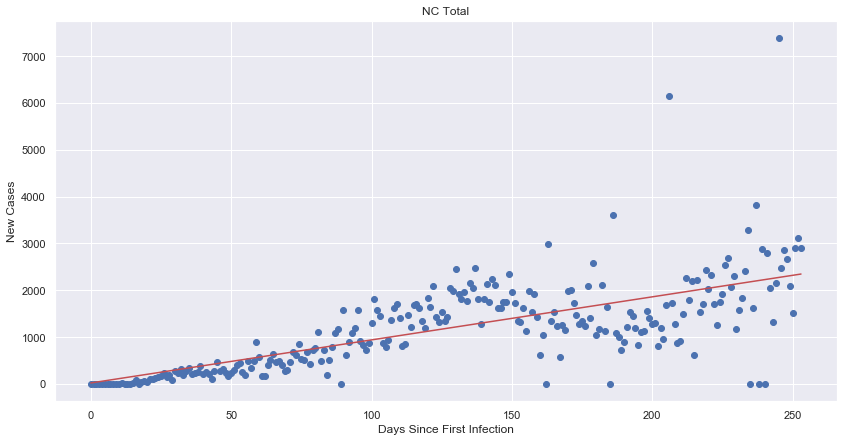

In [31]:
state_total = cases_t.iloc[:,1:].sum(axis=1).astype(int)
# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(state_total, -1)
state = state_total[index:]
state = state.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(state.index, dtype=float)
Y = np.array(state, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title("NC Total")
plt.scatter(x=state.index, y=state)
plt.plot(X1, prediction, color = 'r')
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
counties = ['Mecklenburg_County', 'Wake_County', 'Guilford_County','Durham_County','Forsyth_County']

Top 5 Counties

RMSE:
100.39713799739563


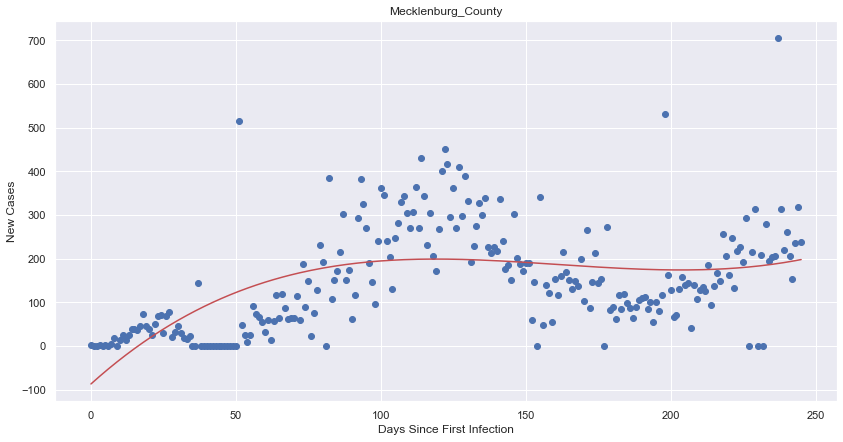

In [33]:
currenty_county = 0

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
68.06734942914622


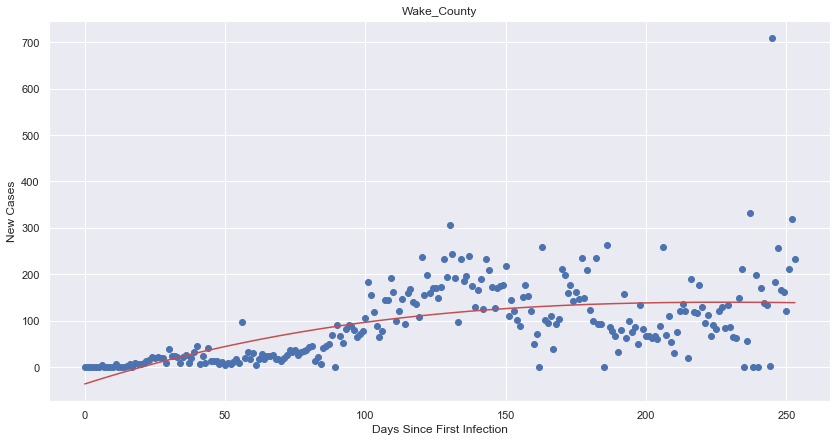

In [34]:
currenty_county = 1

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
35.99510837354392


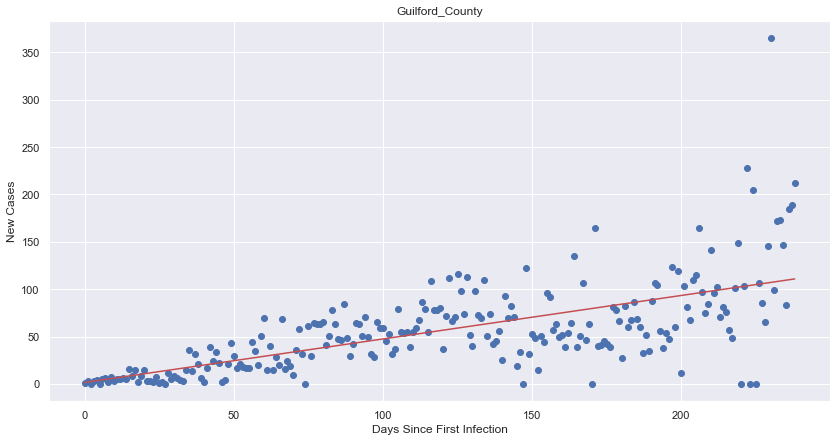

In [35]:
currenty_county = 2

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
27.505021117955607


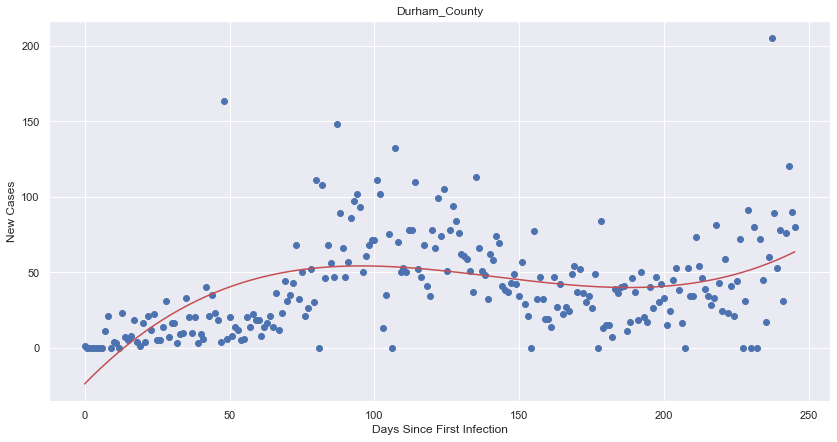

In [36]:
currenty_county = 3

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))
plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
27.5482964468945


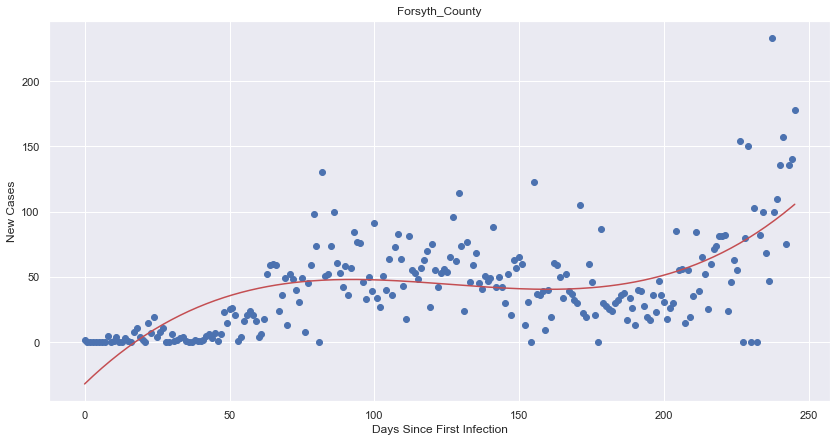

In [37]:
currenty_county = 4

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

### Deaths

RMSE:
6.732465005356093


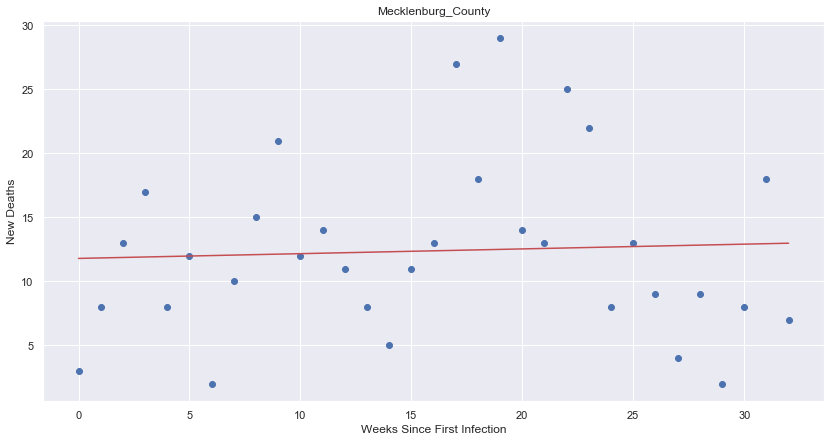

In [38]:
currenty_county = 0

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(deaths_t, counties[currenty_county])
county = deaths_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

#GET WEEKLY TOTALS
weekly_totals = []
for week in range(0, len(county),7):
    weekly_totals.append(county[week:week+7].sum())
county = pd.Series(data=weekly_totals)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Weeks Since First Infection")
plt.ylabel("New Deaths")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
7.0465090622974795


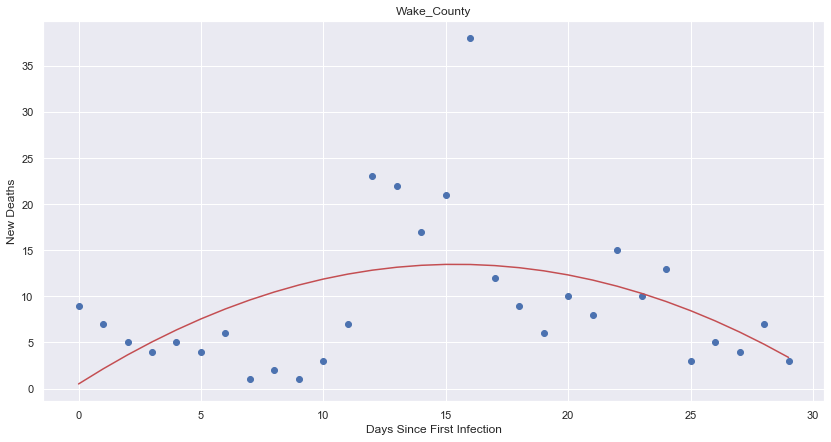

In [39]:
currenty_county = 1

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(deaths_t, counties[currenty_county])
county = deaths_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

#GET WEEKLY TOTALS
weekly_totals = []
for week in range(0, len(county),7):
    weekly_totals.append(county[week:week+7].sum())
county = pd.Series(data=weekly_totals)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=2)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Deaths")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
3.4966073988172925


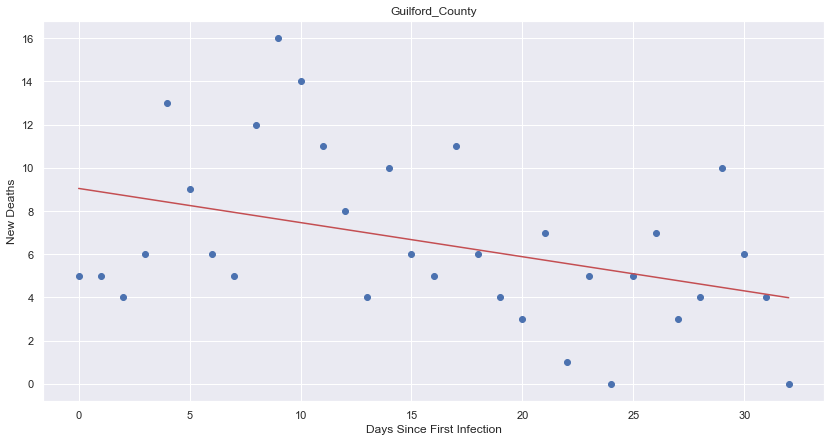

In [40]:
currenty_county = 2

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(deaths_t, counties[currenty_county])
county = deaths_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

#GET WEEKLY TOTALS
weekly_totals = []
for week in range(0, len(county),7):
    weekly_totals.append(county[week:week+7].sum())
county = pd.Series(data=weekly_totals)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Deaths")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
2.3188159271243656


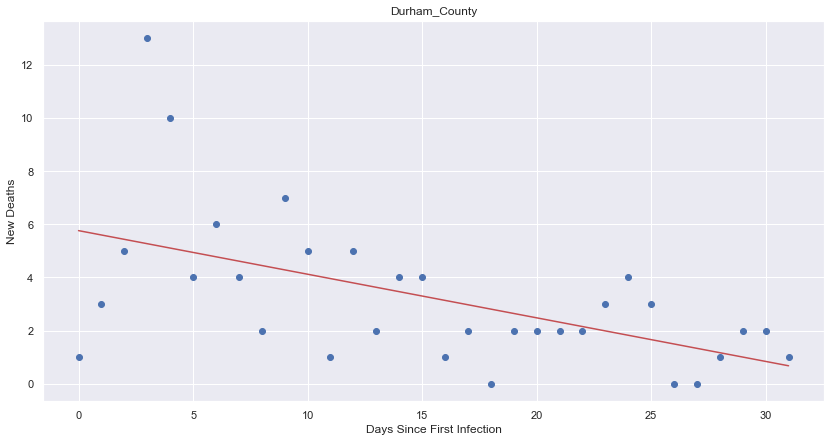

In [41]:
currenty_county = 3

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(deaths_t, counties[currenty_county])
county = deaths_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

#GET WEEKLY TOTALS
weekly_totals = []
for week in range(0, len(county),7):
    weekly_totals.append(county[week:week+7].sum())
county = pd.Series(data=weekly_totals)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Deaths")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

RMSE:
2.876148640080681


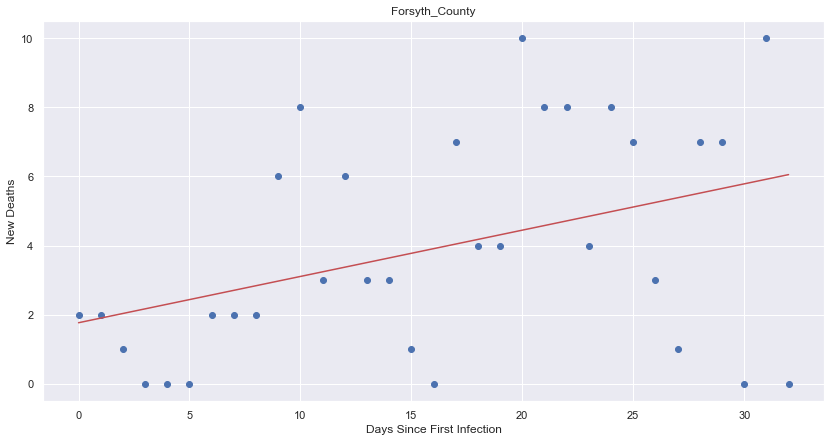

In [42]:
currenty_county = 4

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(deaths_t, counties[currenty_county])
county = deaths_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

#GET WEEKLY TOTALS
weekly_totals = []
for week in range(0, len(county),7):
    weekly_totals.append(county[week:week+7].sum())
county = pd.Series(data=weekly_totals)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction))

plt.xlabel("Days Since First Infection")
plt.ylabel("New Deaths")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(X1, prediction, color = 'r')
plt.show()

## 2) Identify which counties are most at risk. Model for top 5 counties with cases within a state and observe their trends.
To predict which counties are most at risk, I had my models predict 30 days in the future. I judged which was most at risk by looking at which prediction yeilded more new cases.

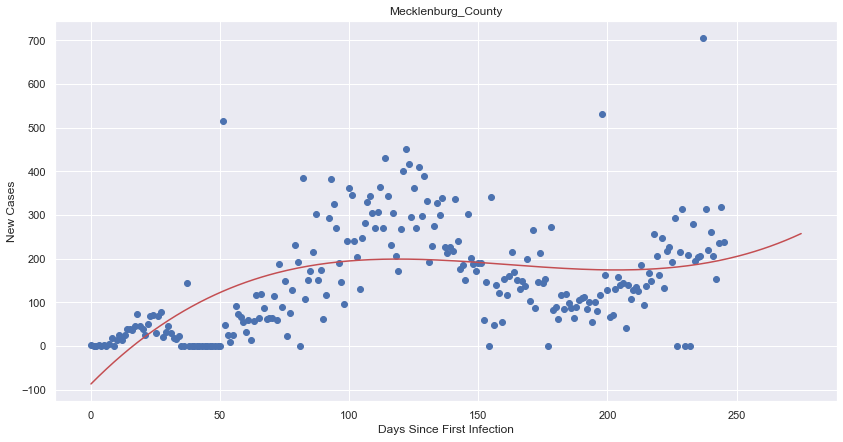

In [43]:
currenty_county = 0

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# MAKE PREDICTION
Xnew = np.arange(len(county.index) + 30)
Xnew = sm.add_constant(Xnew)
polynomial_features= PolynomialFeatures(degree=3)
Xnew = polynomial_features.fit_transform(Xnew)
prediction = model.predict(Xnew)


plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(Xnew[:,2], prediction, color = 'r')
plt.show()

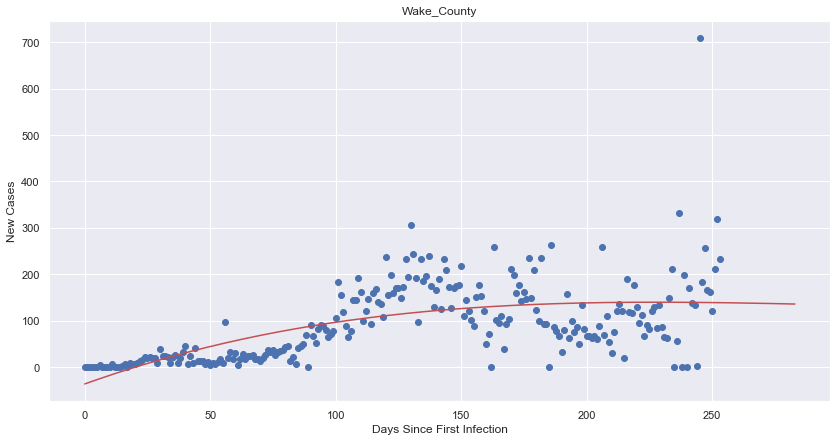

In [44]:
currenty_county = 1

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()
prediction = model.predict()

# MAKE PREDICTION
Xnew = np.arange(len(county.index) + 30)
Xnew = sm.add_constant(Xnew)
polynomial_features= PolynomialFeatures(degree=3)
Xnew = polynomial_features.fit_transform(Xnew)
prediction = model.predict(Xnew)

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(Xnew[:,2], prediction, color = 'r')
plt.show()

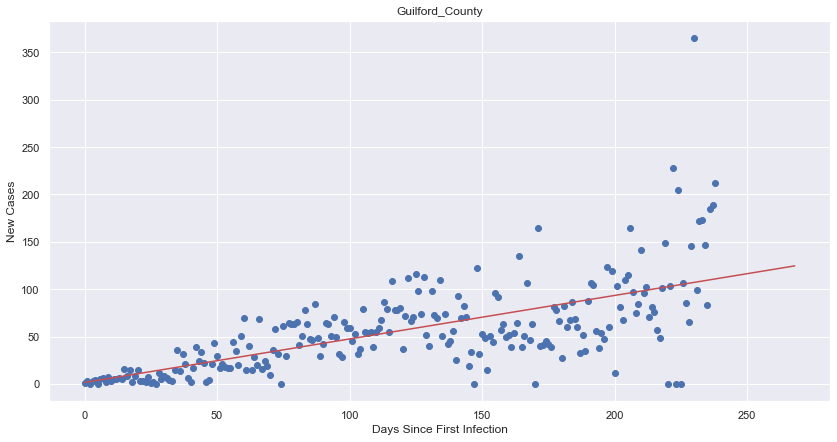

In [52]:
currenty_county = 2

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()

# MAKE PREDICTION
Xnew = np.arange(len(county.index) + 30)
Xnew = sm.add_constant(Xnew)
polynomial_features= PolynomialFeatures(degree=1)
Xnew = polynomial_features.fit_transform(Xnew)
prediction = model.predict(Xnew)

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(Xnew[:,2], prediction, color = 'r')
plt.show()

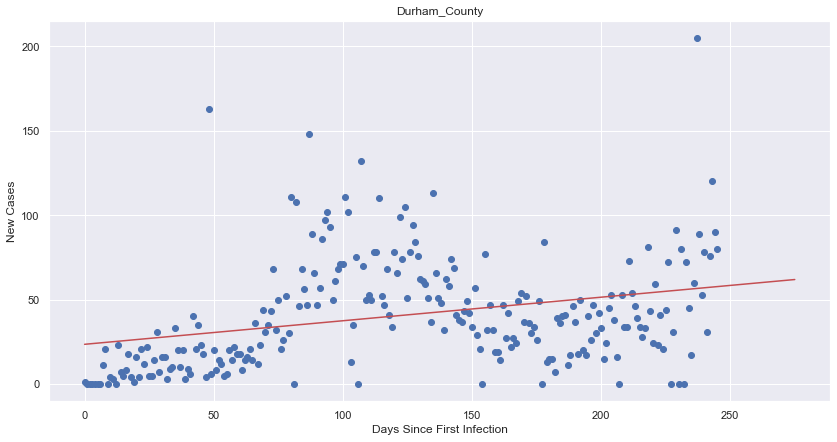

In [46]:
currenty_county = 3

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()

# MAKE PREDICTION
Xnew = np.arange(len(county.index) + 30)
Xnew = sm.add_constant(Xnew)
polynomial_features= PolynomialFeatures(degree=1)
Xnew = polynomial_features.fit_transform(Xnew)
prediction = model.predict(Xnew)

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(Xnew[:,2], prediction, color = 'r')
plt.show()

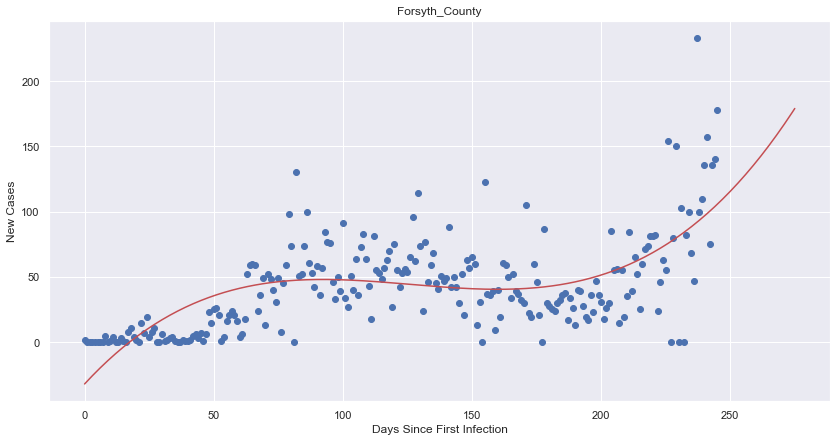

In [47]:
currenty_county = 4

# DROP DAYS BEOFRE FIRST INFECTION
index = get_first_inf_idx_long(cases_t, counties[currenty_county])
county = cases_t.iloc[index:][counties[currenty_county]]
county = county.reset_index(drop=True)

# CREATE MODEL
X1 = np.array(county.index, dtype=float)
Y = np.array(county, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=3)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()

# MAKE PREDICTION
Xnew = np.arange(len(county.index) + 30)
Xnew = sm.add_constant(Xnew)
polynomial_features= PolynomialFeatures(degree=3)
Xnew = polynomial_features.fit_transform(Xnew)
prediction = model.predict(Xnew)

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[currenty_county])
plt.scatter(x=county.index, y=county)
plt.plot(Xnew[:,2], prediction, color = 'r')
plt.show()

## 3) Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
To predict the point of no return in North Carolina I made the follwing assumtions  
-Half of all ICU bed will be occupied by non-covid patients  
-37% of people in the ICU for covid will die  
  
Basicly, I used the number of covid deaths in a week to calculate how many patitients were in the hospital, based on the mortalitly rate once in the ICU. The blue line represents the max-capacity for covid patients in the hospital. When the model crosses that line, the point of no return has been reached. 

   

In [48]:
hospital = pd.read_csv('../../data/Hospitals/hospital_merged_covid.csv')
hospital = hospital[['State', 'NUM_ICU_BEDS']]
hospital = hospital.loc[hospital['State'] == myState]
hospital = hospital.loc[hospital['NUM_ICU_BEDS'].notna()]
total_beds = hospital['NUM_ICU_BEDS'].sum()

#ASSUME HALF OF BEDS WILL USED FOR NON-COVID PATIENTS
avail_beds = total_beds//2

RMSE:
131.70692762878116


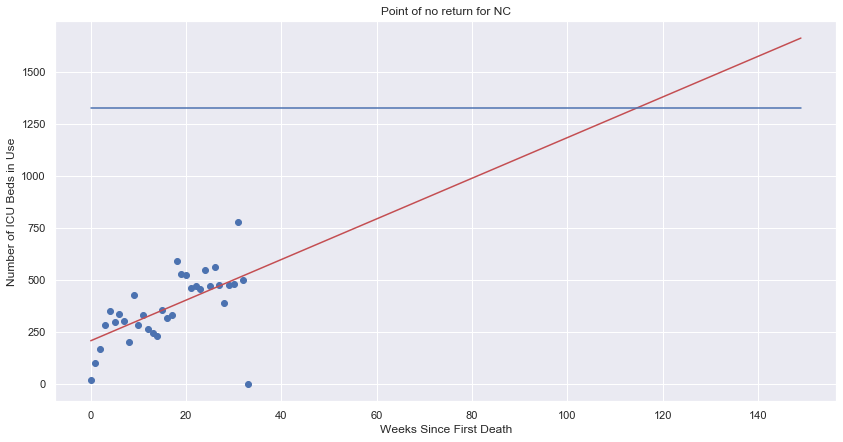

In [53]:
deaths_usa = pd.read_csv('data/normalized/new_deaths_non_normalized.csv')
deaths_state = deaths_usa.loc[deaths_usa['State'] == myState]
deaths_state = deaths_state.iloc[1:,5:]
deaths_state = deaths_state.sum()
deaths_state = deaths_state.reset_index(drop=True)

icu_mortality_rate = .37

#DROP COLUMNS BEFORE FIRST DEATH
first_death = deaths_state.ne(0).idxmax()
deaths_state = deaths_state[first_death:]

#GET WEEKLY TOTALS
weekly_totals = []
for week in range(0, len(deaths_state),7):
    weekly_totals.append(deaths_state[week:week+7].sum())
weekly_totals = pd.Series(data=weekly_totals)
#MULTIPLY THE TOTAL DEATHS BY 1/(ICU-MORTALITY-RATE) TO GET NUMBER OF OCCUPIED BEDS
weekly_totals = weekly_totals * (1/.37)


# CREATE MODEL
X1 = np.array(weekly_totals.index, dtype=float)
Y = np.array(weekly_totals, dtype=float)
X = sm.add_constant(X1)
polynomial_features= PolynomialFeatures(degree=1)
newX = polynomial_features.fit_transform(X)
model = sm.OLS(Y, newX).fit()

# MAKE PREDICTION
Xnew = np.arange(150)
Xnew = sm.add_constant(Xnew)
polynomial_features= PolynomialFeatures(degree=1)
Xnew = polynomial_features.fit_transform(Xnew)
prediction = model.predict(Xnew)

#CALCULATE RMSE
print('RMSE:')
print(rmse(Y, prediction[:len(Y)]))

pnr = [avail_beds] * 150
plt.xlabel("Weeks Since First Death")
plt.ylabel("Number of ICU Beds in Use")
plt.title("Point of no return for NC")
plt.scatter(x=weekly_totals.index, y=weekly_totals)
plt.plot(range(0,150), prediction, color = 'r')
plt.plot(range(0,150), pnr, color = 'b')
plt.show()


## 4) Utilize decision tree, random forest, and ARIMA based models to compare and contrast the performance of each. X-variable is the previous weeks data, Y-variable is current week data. So you are predicting one week in advance. Calculate RMSE error. This is just based on number of cases.

#### Random Forest

C:\Users\andyk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\andyk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


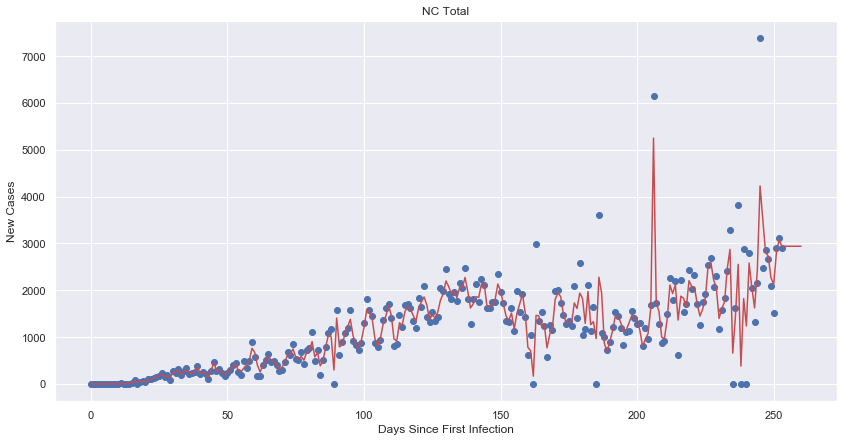

In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X = np.array(state.index, dtype=float).reshape(-1, 1)
Y = np.array(state, dtype=float).reshape(-1, 1)

model.fit(X,Y)
Xnew = X
for i in range(0,7):
    Xnew = np.append(Xnew, float(len(X)+i))
Xnew = Xnew.reshape(-1, 1)
y_fit = model.predict(Xnew)

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title("NC Total")
plt.scatter(x=X, y=state)
plt.plot(Xnew, y_fit, color = 'r')
plt.show()


#### Decision Tree

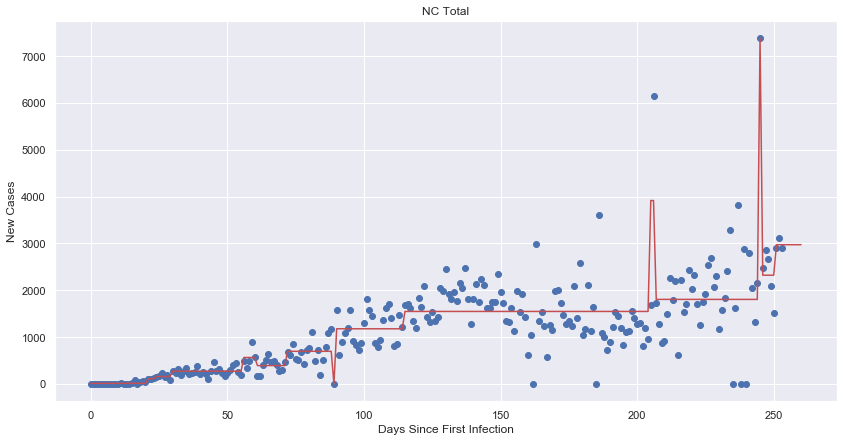

In [59]:
from sklearn.tree import DecisionTreeRegressor
X = np.array(state.index, dtype=float).reshape(-1, 1)
Y = np.array(state, dtype=float).reshape(-1, 1)
dtr = DecisionTreeRegressor(max_depth=4)
model = dtr.fit(X,Y)
Xnew = X
for i in range(0,7):
    Xnew = np.append(Xnew, float(len(X)+i))
Xnew = Xnew.reshape(-1, 1)
y_pred = model.predict(Xnew)


plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title("NC Total")
plt.scatter(x=X, y=state)
plt.plot(Xnew, y_pred, color = 'r')
plt.show()